## Lecture 9 – Data 100, Summer 2021

by Suraj Rampure, updates by Fernando Pérez.

adapted from Ani Adhikari

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
births = pd.read_csv('baby.csv')

In [3]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [4]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [5]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

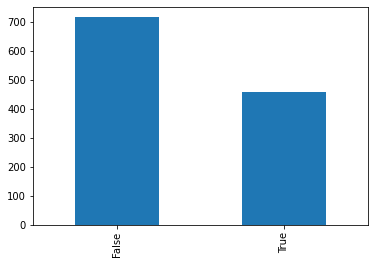

In [6]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

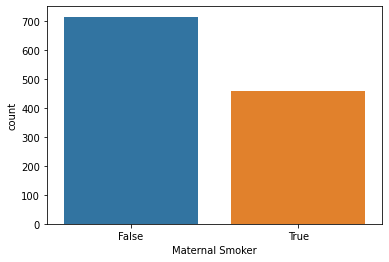

In [7]:
sns.countplot(x=births['Maternal Smoker']);

But we can also use them to display a numerical variable that has been measured on individuals in different categories.

In [8]:
# These are made up!
majors = ['Data Science', 'History', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]

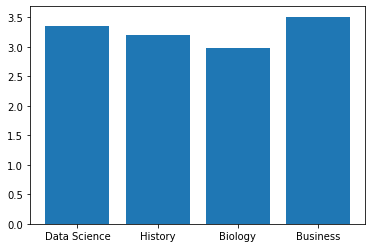

In [9]:
# What if we change bar to barh?
plt.bar(majors, gpas);

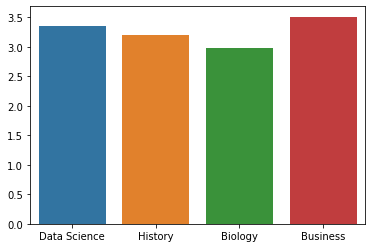

In [10]:
sns.barplot(x=majors, y=gpas);

## Rug plots

Used for visualizing a single quantitative variable. Rug plots show us each and every value.

In [11]:
bweights = births["Birth Weight"]

In [12]:
bweights

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

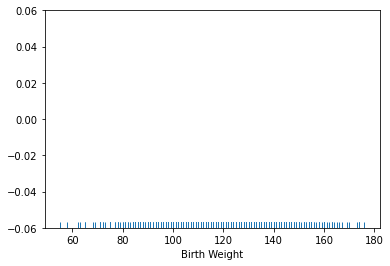

In [13]:
sns.rugplot(bweights);

## Histograms

Our old friend!

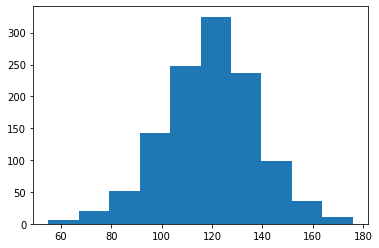

In [14]:
# By default, you get some arbitrary bins. We often like to pick our own.
plt.hist(bweights);

In [15]:
min(bweights), max(bweights)

(55, 176)

In [16]:
bw_bins = range(50, 200, 5)

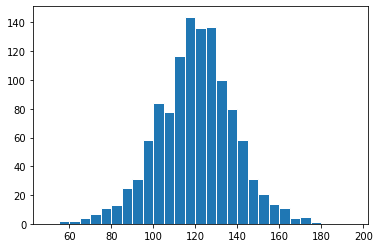

In [17]:
plt.hist(bweights, bins=bw_bins, ec='w');

The above plot shows _counts_, if we want to see a _distribution_ we can use the `density` keyword:

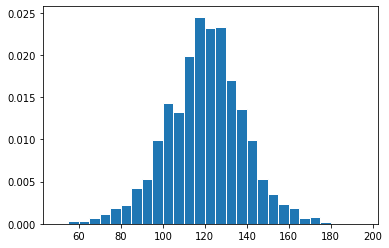

In [18]:
plt.hist(bweights, density=True, bins=bw_bins, ec='w');

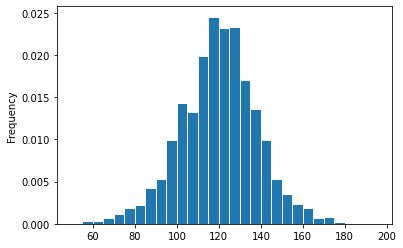

In [19]:
# alternative way of getting this plot
bweights.plot(kind = 'hist', density=True, bins=bw_bins, ec='w');

Increasing bin width loses granularity, but this may be fine for our purposes.

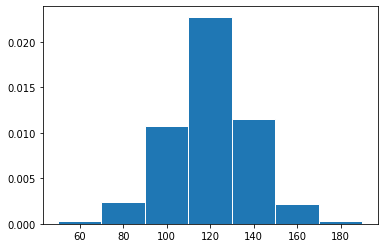

In [20]:
plt.hist(bweights, bins = np.arange(50, 200, 20), density=True, ec='w');

The bin widths don't all need to be the same!

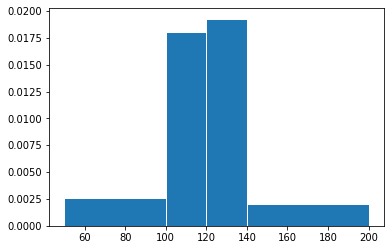

In [21]:
plt.hist(bweights, bins = [50, 100, 120, 140, 200], density=True, ec='w');

## Density Curves

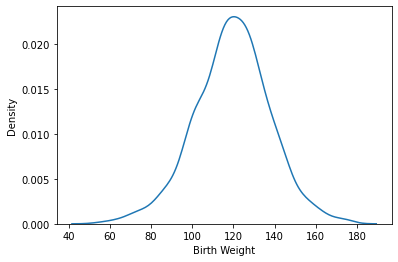

In [22]:
sns.kdeplot(bweights);

Seaborn has [several related functions for plotting distributions](https://seaborn.pydata.org/tutorial/distributions.html): `kdeplot`, `histplot`, `rugplot` and `displot`. The latter is more generic but uses the others under the hood:

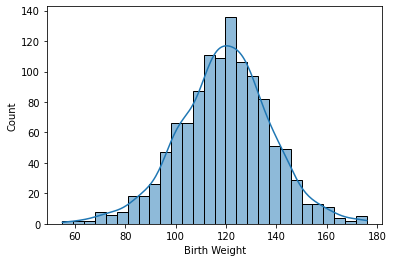

In [23]:
sns.histplot(bweights, kde=True);

Can even show a rugplot with it!

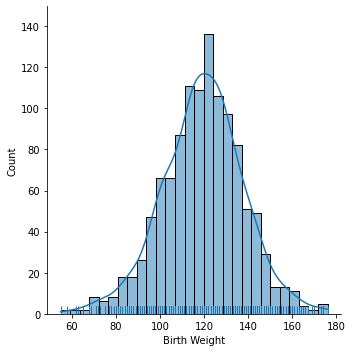

In [24]:
sns.displot(bweights, kde=True, rug=True);

`displot` is quite flexible, so instead of a histogram we can ask it, for example, to show the density curve and rugplot only:

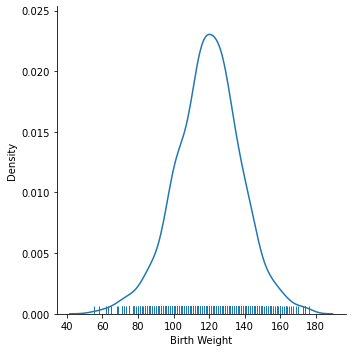

In [25]:
sns.displot(bweights, kind='kde', rug=True);

## Box Plots

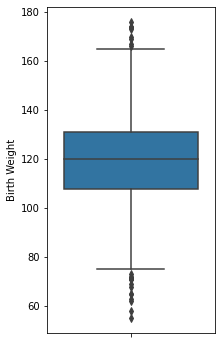

In [26]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=bweights);

In [27]:
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

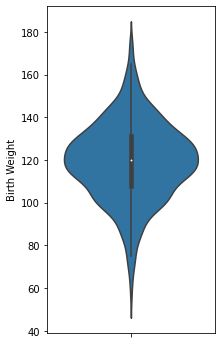

In [28]:
plt.figure(figsize = (3, 6))
sns.violinplot(y=bweights);

## Overlaid Histograms and Density Curves

In [29]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [30]:
sm_bweights = births[births['Maternal Smoker'] == True]['Birth Weight']
nsm_bweights = births[births['Maternal Smoker'] == False]['Birth Weight']

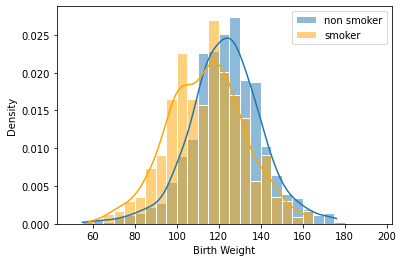

In [31]:
sns.histplot(nsm_bweights, bins=bw_bins, kde=True, stat='density', label='non smoker', ec='w');
sns.histplot(sm_bweights, bins=bw_bins, kde=True, stat='density', label='smoker', color='orange', ec='w');
plt.legend();

## Side by side box plots and violin plots

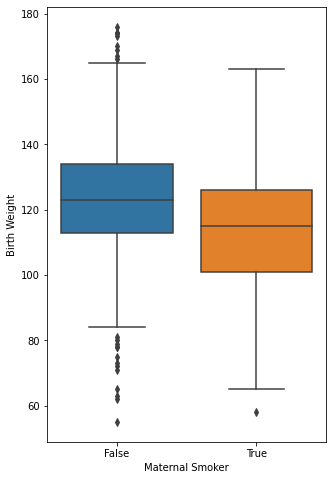

In [32]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

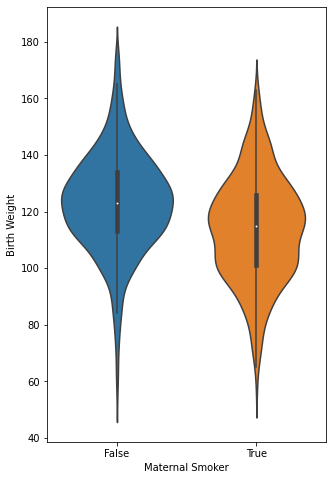

In [33]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

A less fancy version of the above two plots:

In [34]:
two_distributions = [nsm_bweights.values, sm_bweights.values]
groups = ['non-smokers', 'smokers']

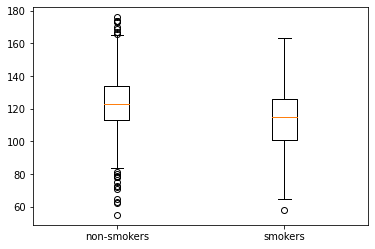

In [35]:
plt.boxplot(two_distributions, labels=groups);

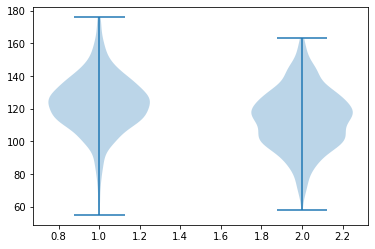

In [36]:
plt.violinplot(two_distributions);

## Scatter plots

In [37]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


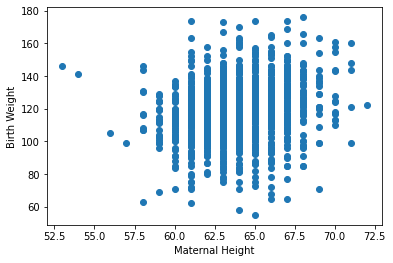

In [38]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

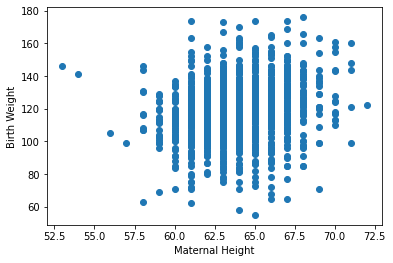

In [39]:
plt.scatter(data=births, x='Maternal Height', y='Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

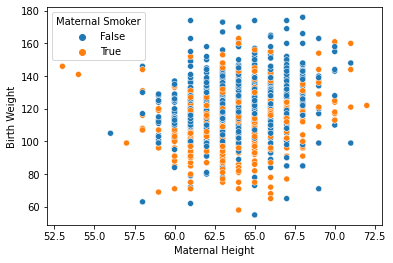

In [40]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

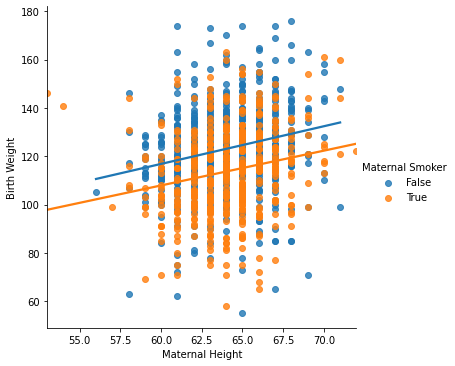

In [41]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', ci=False, hue='Maternal Smoker');

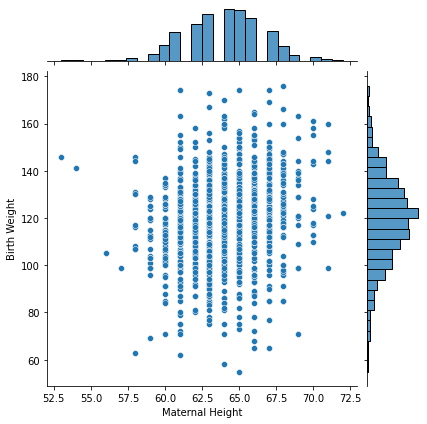

In [42]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

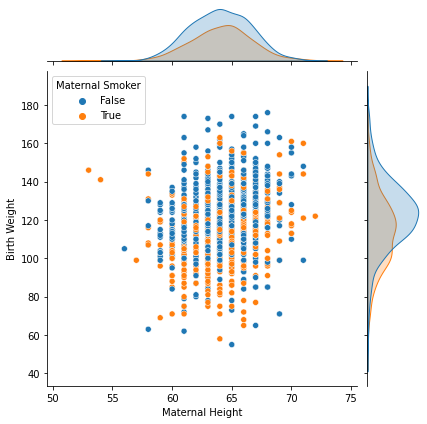

In [43]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue='Maternal Smoker');

## Hex plots and contour plots

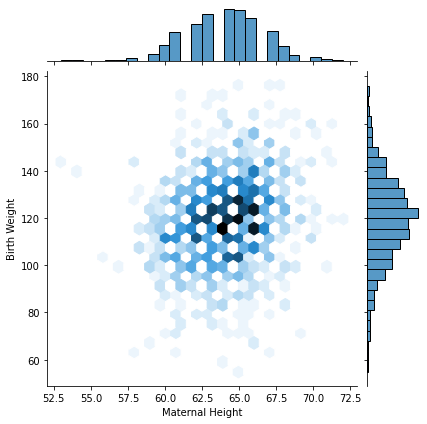

In [44]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='hex');

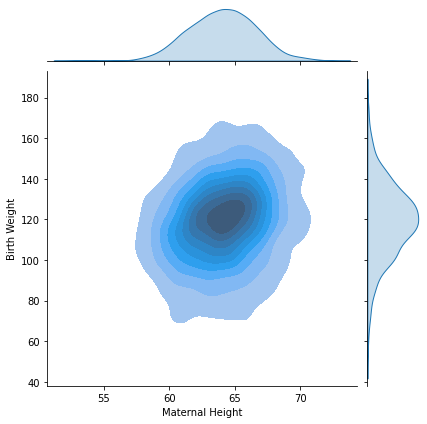

In [45]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', fill=True);

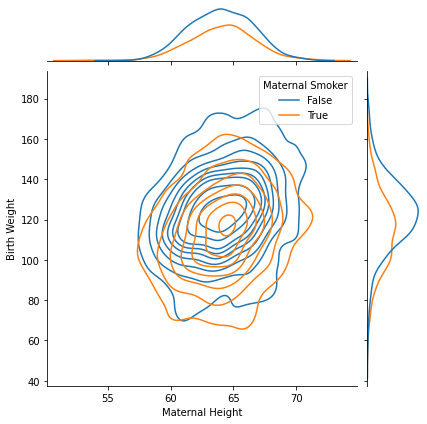

In [46]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', hue='Maternal Smoker');

## Bonus

Calling `.plot()` results in weird things!

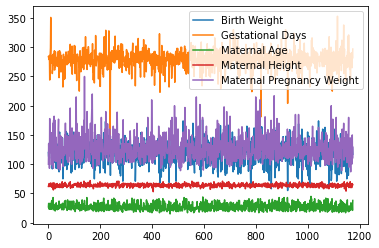

In [47]:
births.plot();